# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175

   Dataset yang diterbitkan pada tahun 1996 ini berisi statistik kesehatan dan informasi kategorikal mengenai pasien yang didiagnosis dengan AIDS, memberikan wawasan mendalam tentang kondisi pasien pada masa tersebut.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

PROJECT_PATH = "."

Mounted at /content/drive


# **3. Memuat Dataset**

In [2]:
df = pd.read_csv(f"{PROJECT_PATH}/AIDS_Classification.csv")
df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,1091,3,21,53.2980,1,0,0,100,0,1,...,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,...,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,...,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,...,0,1,0,0,0,166,169,999,1838,1


# **4. Exploratory Data Analysis (EDA)**

### **Informasi Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

Dataset ini terdiri dari 2139 baris dan 23 kolom. Semua kolom memiliki 2139 entri non-null, menunjukkan tidak adanya nilai hilang yang menjadi keunggulan dalam analisis lebih lanjut. Secara tipe data, 22 kolom bertipe int64, mencakup data kategorikal atau diskrit, sementara wtkg bertipe float64, menandakan data kontinu seperti berat badan.

### **Distribusi Fitur Kategorik**

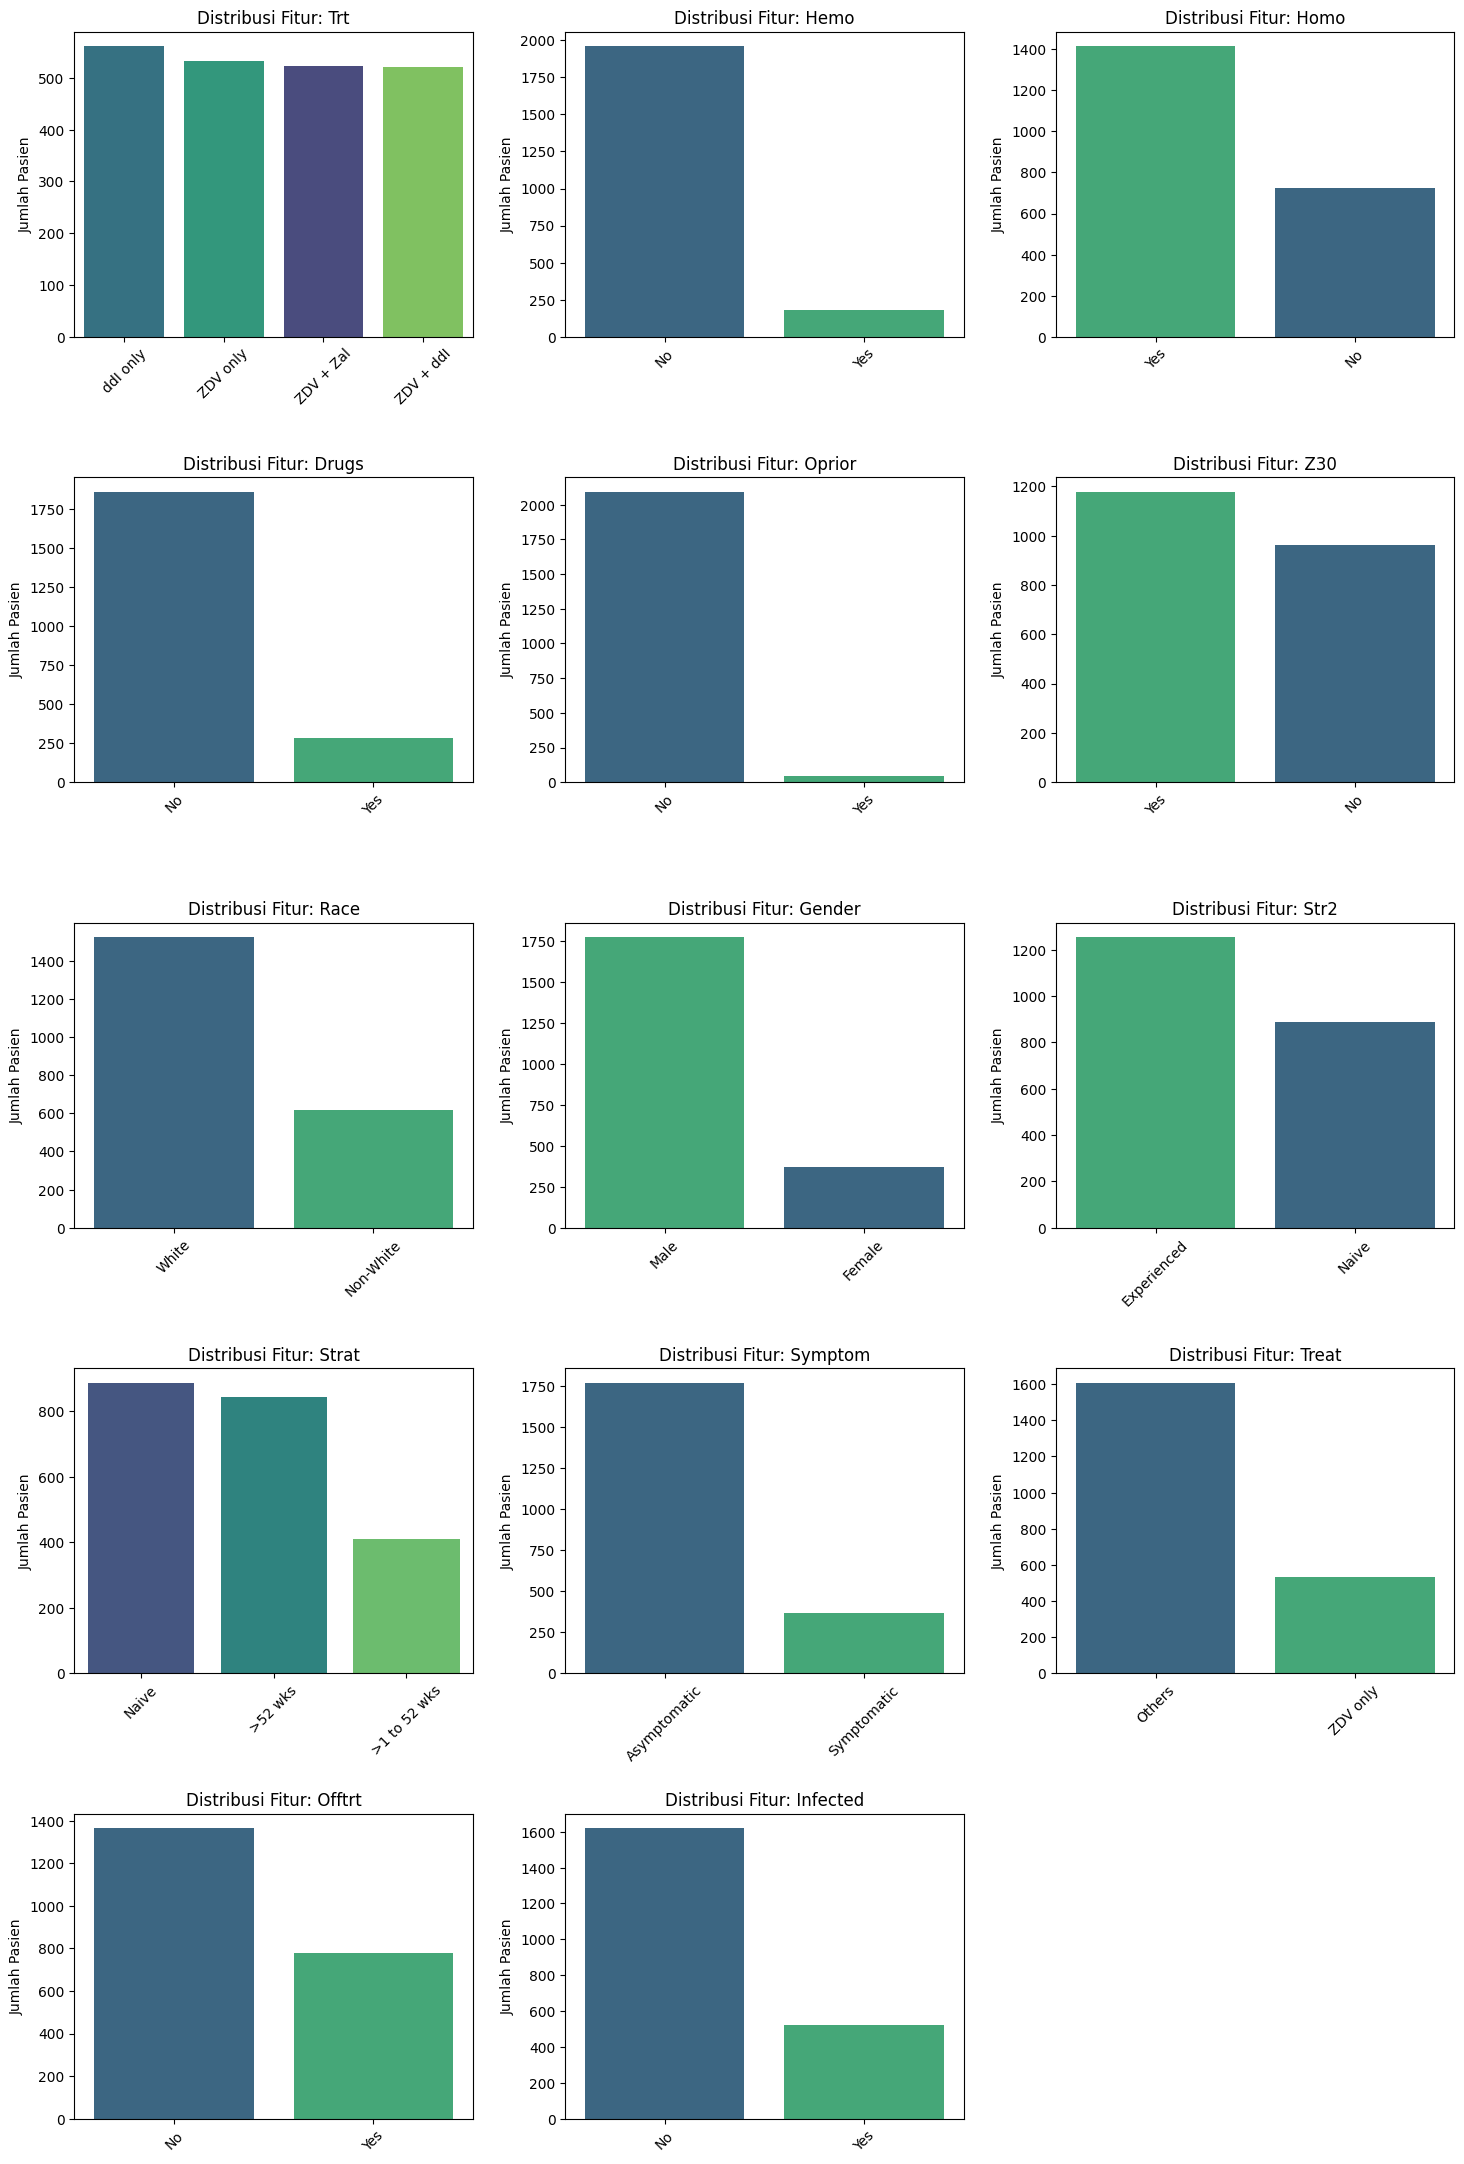

In [4]:
df_mapped = df.copy()

mapping_dict = {
    'trt': {0: 'ZDV only', 1: 'ZDV + ddI', 2: 'ZDV + Zal', 3: 'ddI only'},
    'hemo': {0: 'No', 1: 'Yes'},
    'homo': {0: 'No', 1: 'Yes'},
    'drugs': {0: 'No', 1: 'Yes'},
    'oprior': {0: 'No', 1: 'Yes'},
    'z30': {0: 'No', 1: 'Yes'},
    'race': {0: 'White', 1: 'Non-White'},
    'gender': {0: 'Female', 1: 'Male'},
    'str2': {0: 'Naive', 1: 'Experienced'},
    'strat': {1: 'Naive', 2: '>1 to 52 wks', 3: '>52 wks'},
    'symptom': {0: 'Asymptomatic', 1: 'Symptomatic'},
    'treat': {0: 'ZDV only', 1: 'Others'},
    'offtrt': {0: 'No', 1: 'Yes'},
    'infected': {0: 'No', 1: 'Yes'}
}

for col, mapping in mapping_dict.items():
    df_mapped[col] = df_mapped[col].replace(mapping)

categorical_features = [
    'trt', 'hemo', 'homo', 'drugs', 'oprior', 'z30', 'race', 'gender',
    'str2', 'strat', 'symptom', 'treat', 'offtrt', 'infected'
]

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 22))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    ax = sns.countplot(
        x=col,
        data=df_mapped,
        ax=axes[i],
        hue=col,
        legend=False,
        palette='viridis',
        order=df_mapped[col].value_counts().index)

    ax.set_title(f'Distribusi Fitur: {col.capitalize()}')
    ax.set_xlabel('')
    ax.set_ylabel('Jumlah Pasien')

    ax.tick_params(axis='x', labelrotation=45)


for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(pad=2.0)
plt.show()

Dataset ini memiliki karakteristik yang sangat tidak seimbang (imbalanced) pada sebagian besar fiturnya. Profil pasien secara umum didominasi oleh laki-laki, ras kulit putih (White), non-pengguna narkoba suntik, dan tidak memiliki riwayat hemofilia. Sebagian besar pasien juga tercatat asimtomatik (tanpa gejala).

Pada target pun memiliki ketidakseimbangan kelas yang bisa di lakukan oversampling nantinya pada tahap preprocessing.

### **Distribusi Fitur Kategori Terhadap Target**

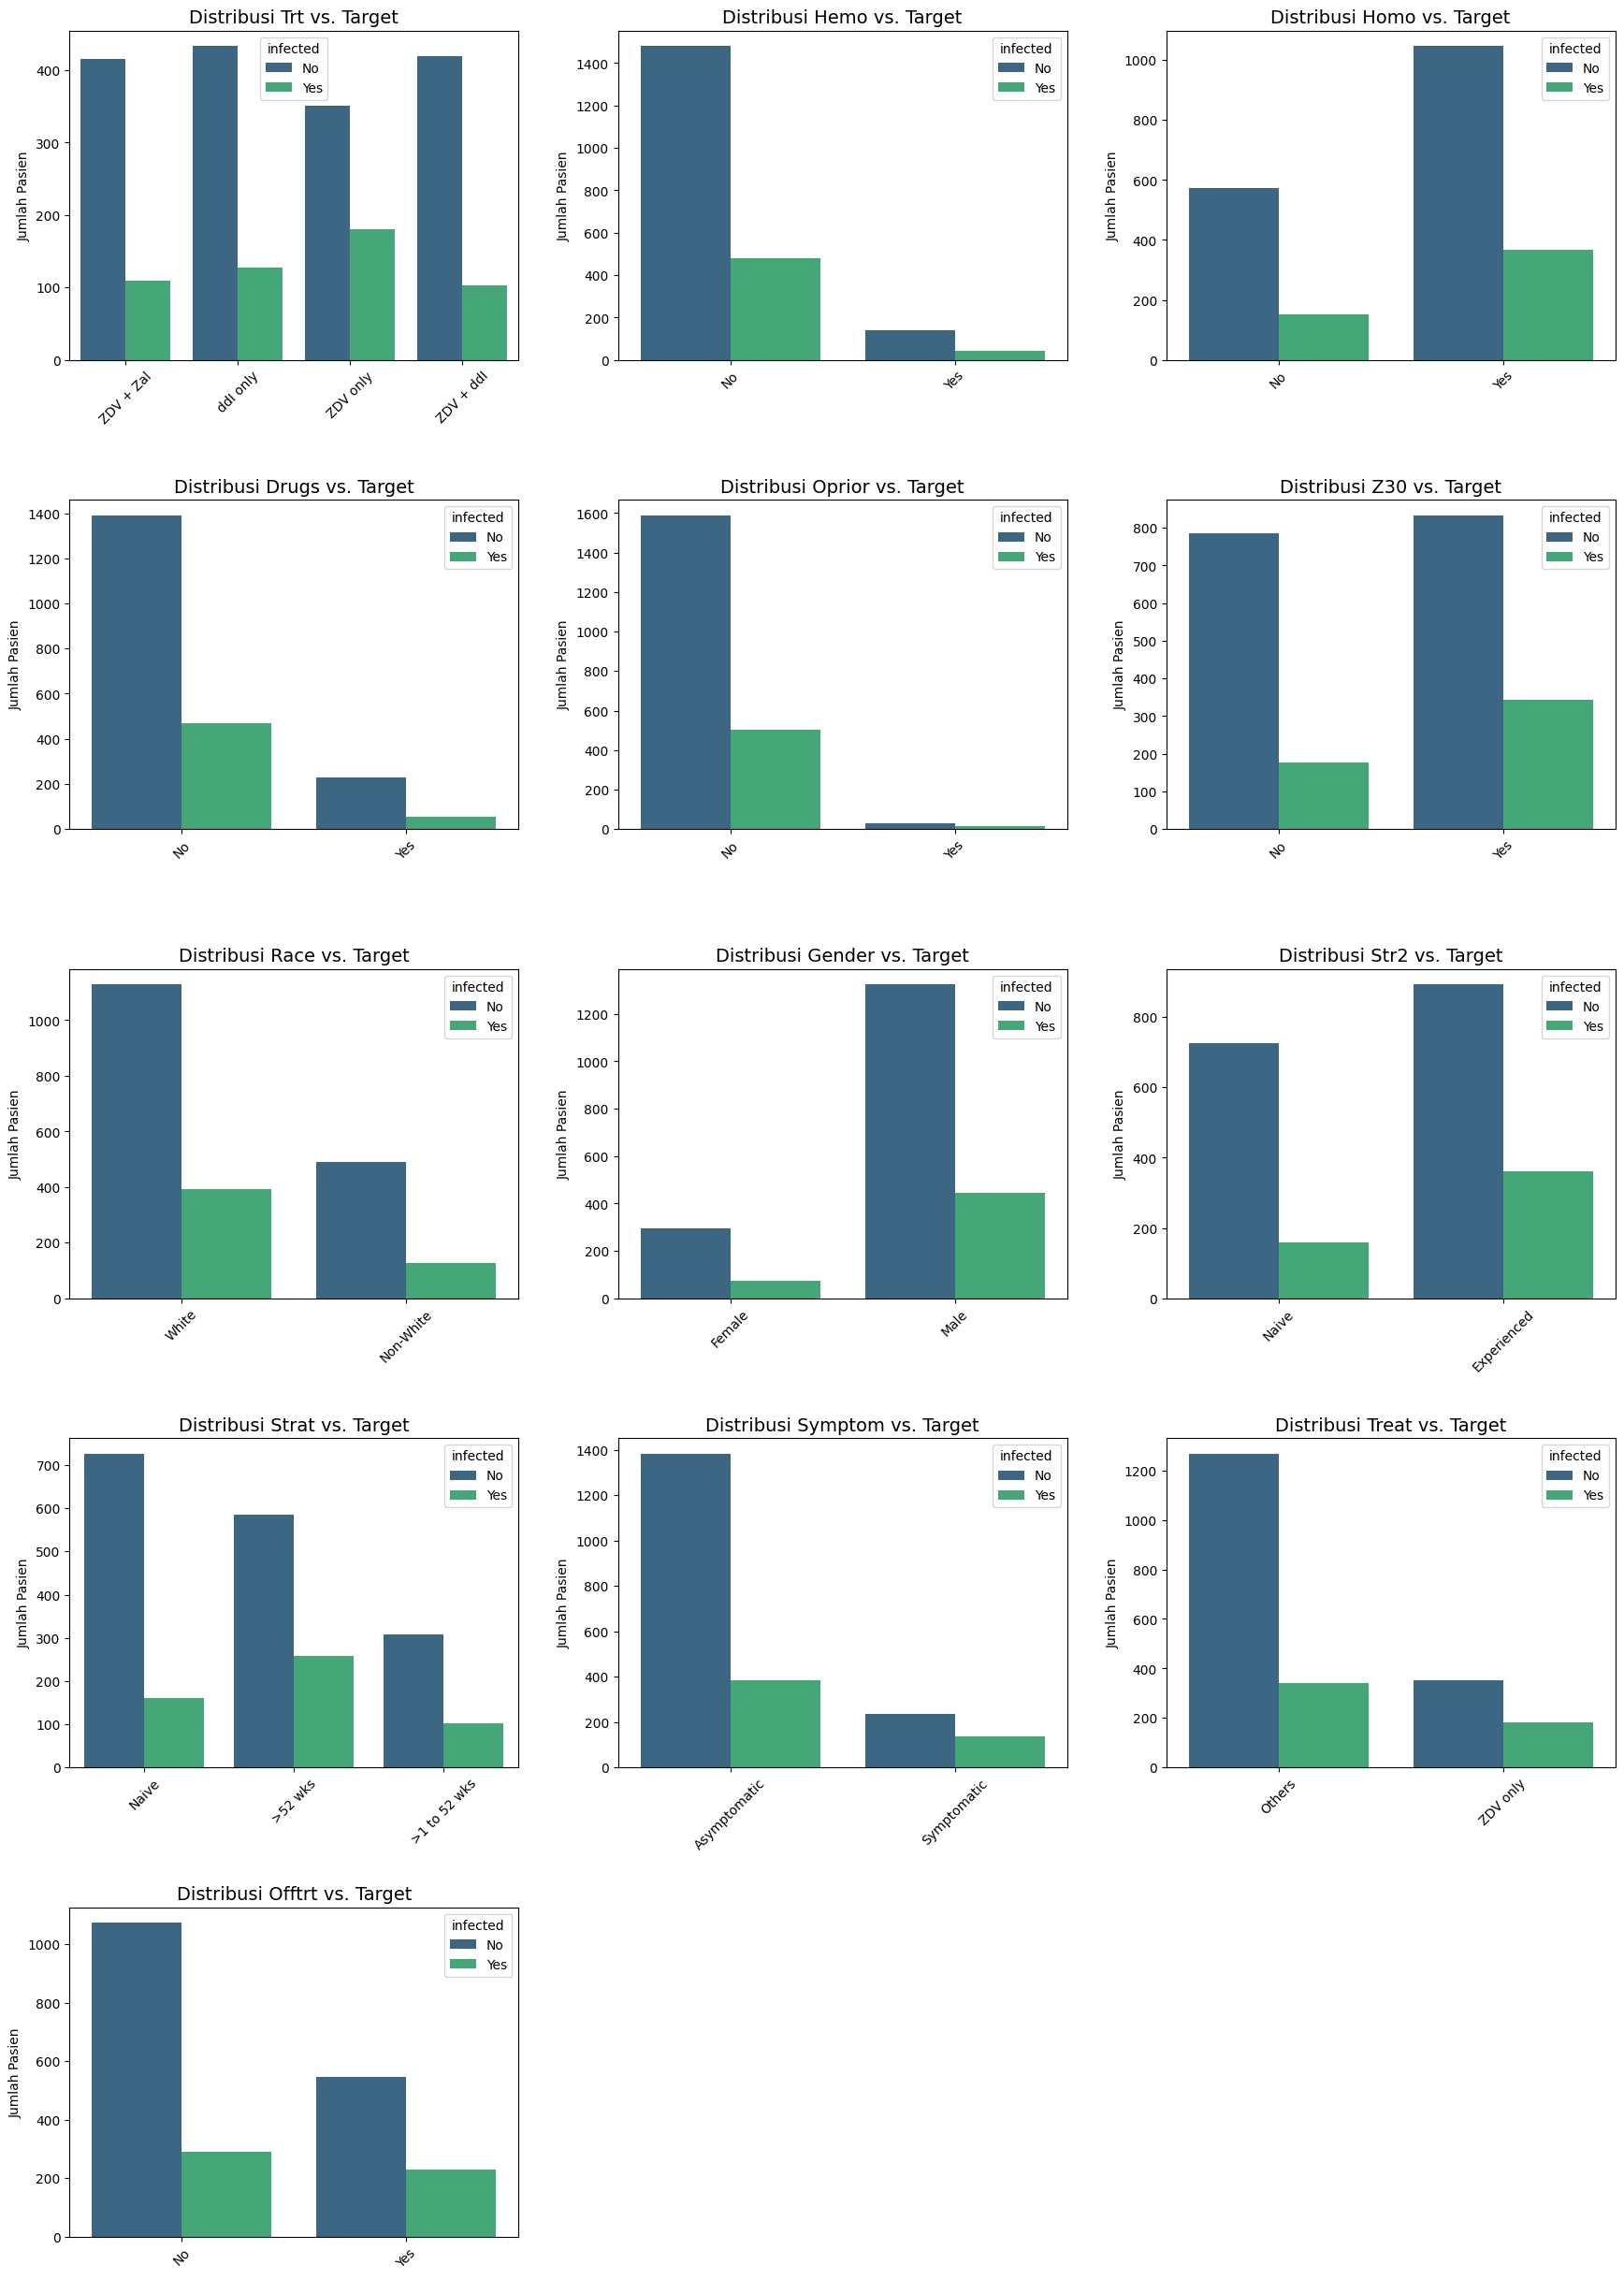

In [5]:
features_to_plot = [
    'trt', 'hemo', 'homo', 'drugs', 'oprior', 'z30', 'race', 'gender',
    'str2', 'strat', 'symptom', 'treat', 'offtrt'
]

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 25))
axes = axes.flatten()

for i, col in enumerate(features_to_plot):
    sns.countplot(
        x=col,
        hue='infected',
        data=df_mapped,
        ax=axes[i],
        palette='viridis'
    )

    axes[i].set_title(f'Distribusi {col.capitalize()} vs. Target', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Jumlah Pasien')
    axes[i].tick_params(axis='x', labelrotation=45)

for i in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(pad=3.0)
plt.show()

- Pasien yang bergejala (Symptomatic) atau memiliki riwayat infeksi oportunistik (Oprior) menunjukkan tingkat infeksi yang secara dramatis lebih tinggi. Ini adalah prediktor risiko terkuat.
- Pasien yang berhenti/keluar dari program perawatan (Offtrt) memiliki risiko infeksi yang jauh lebih tinggi dibandingkan mereka yang tetap dalam perawatan.
- Pasien dengan riwayat penggunaan narkoba suntik (Drugs) memiliki proporsi infeksi yang lebih tinggi.
- Terapi kombinasi ZDV + ddI secara visual tampak paling efektif, karena menunjukkan rasio infeksi yang paling rendah di antara empat jenis perawatan (Trt).
- Pasien yang sudah berpengalaman (Experienced) dengan obat antiretroviral justru menunjukkan tingkat infeksi yang sedikit lebih tinggi, kemungkinan karena mereka sudah resisten atau gagal pada terapi sebelumnya.
- Faktor demografis seperti Gender, Race, dan Homo (homoseksual) tidak menunjukkan perbedaan yang jelas dalam tingkat risiko infeksi berdasarkan visualisasi ini.

### **Distribusi Fitur Numerik terhadap target**

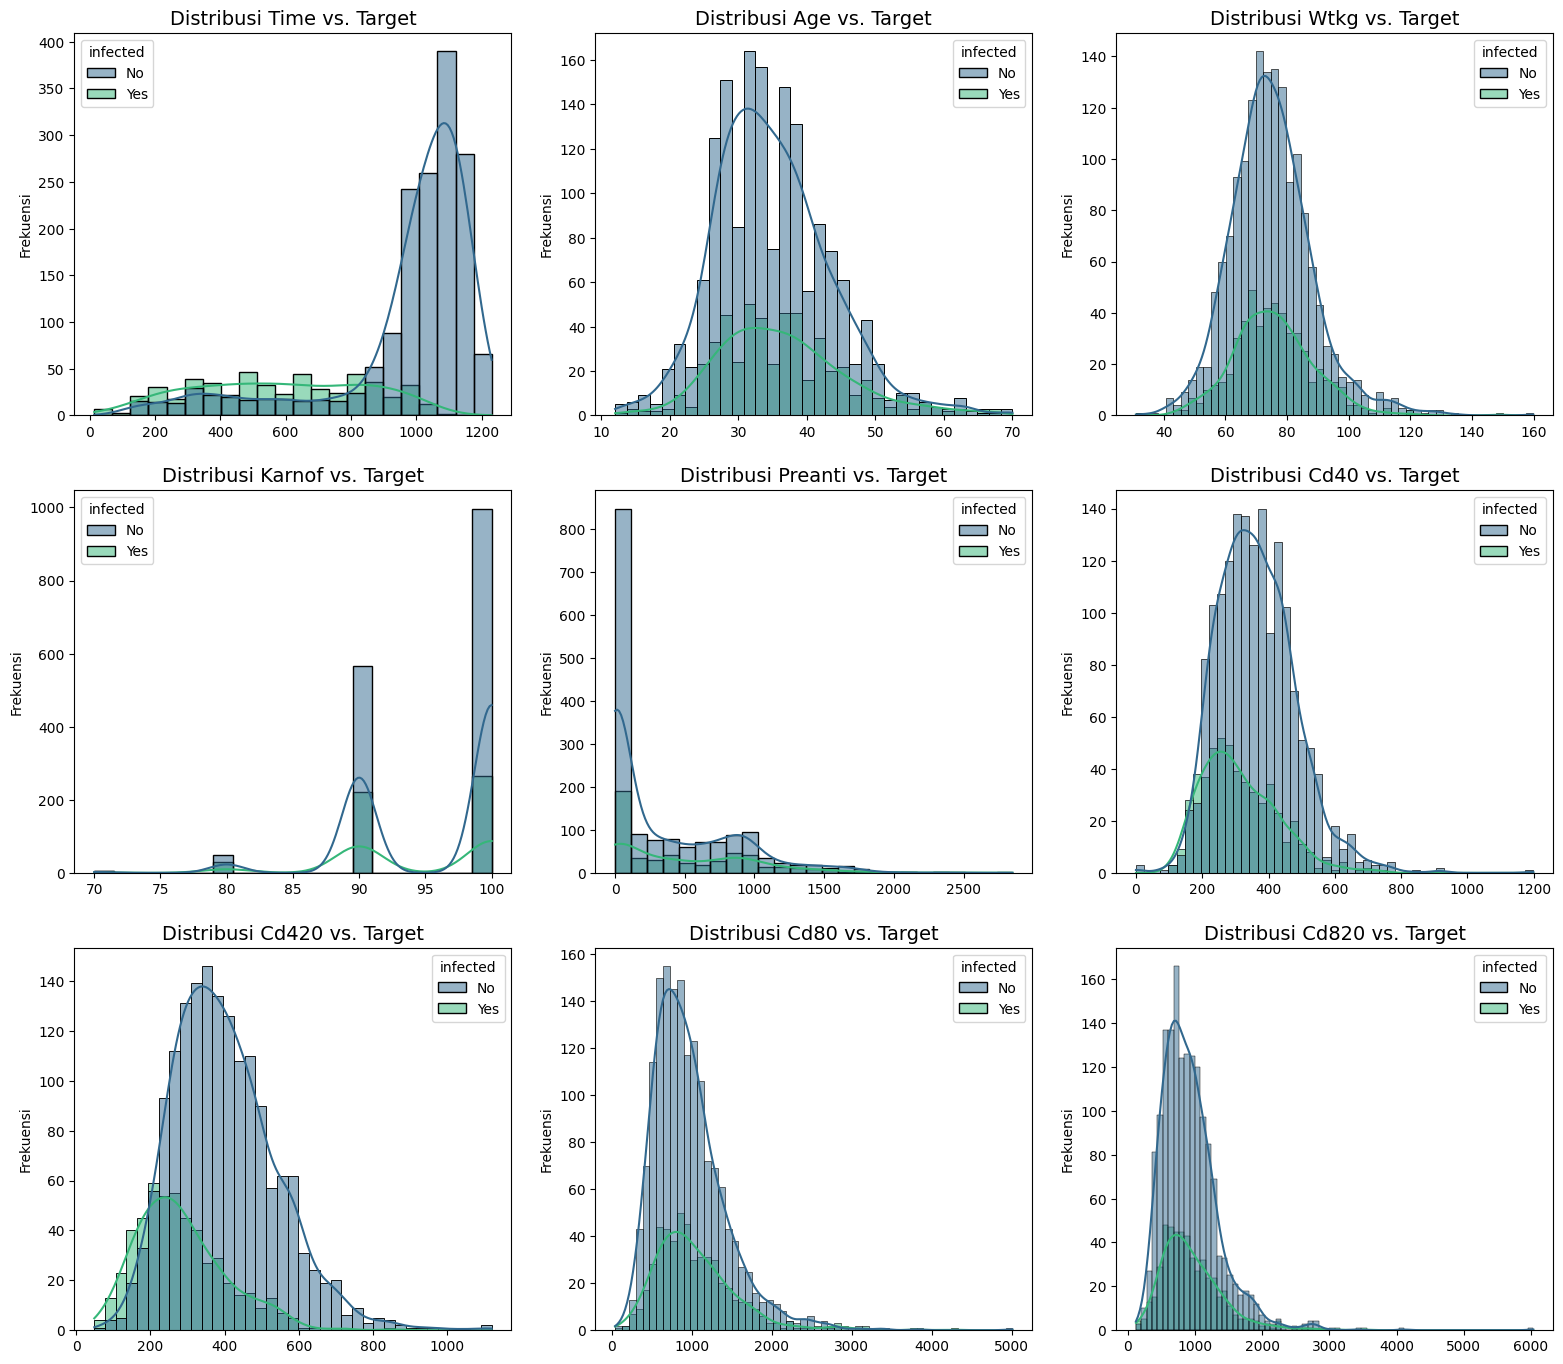

In [6]:
numerical_features = [
    'time', 'age', 'wtkg', 'karnof', 'preanti',
    'cd40', 'cd420', 'cd80', 'cd820'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(
        data=df_mapped,
        x=col,
        hue='infected',
        kde=True,
        ax=axes[i],
        palette='viridis' # Menggunakan palet yang konsisten
    )

    axes[i].set_title(f'Distribusi {col.capitalize()} vs. Target', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frekuensi')

# Merapikan layout
plt.tight_layout(pad=2.0)
plt.show()

- Time (Waktu hingga Kegagalan/Infeksi), Ini adalah validasi dari hasil itu sendiri. Distribusi hijau (Yes) jelas bergeser ke kiri (nilai time lebih rendah), yang berarti pasien yang terinfeksi AIDS mencapai titik "kegagalan" ini dalam waktu yang jauh lebih singkat.
- Karnof (Skor Fungsional Karnofsky), Terdapat perbedaan yang sangat mencolok. Kelompok biru (No) memiliki puncak yang sangat tinggi di skor 100 (kondisi fungsional sangat baik). Sebaliknya, kelompok hijau (Yes) memiliki distribusi yang lebih menyebar ke arah skor yang lebih rendah (90, 80, 70), menandakan pasien dengan kondisi fungsional yang lebih buruk secara signifikan lebih mungkin terinfeksi AIDS.
- Cd40 (Jumlah CD4 Awal), Terlihat pemisahan yang sangat jelas. Distribusi hijau (Yes) bergeser ke kiri, menunjukkan bahwa pasien dengan jumlah CD4 awal yang lebih rendah memiliki risiko lebih tinggi untuk terinfeksi AIDS.
- Cd420 (Jumlah CD4 di Minggu ke-20), Pola yang sama berlanjut. Perbedaan antara kedua kelompok tetap signifikan setelah 20 minggu perawatan, mengkonfirmasi bahwa jumlah CD4 adalah indikator kunci sepanjang waktu.
- Cd80 (Jumlah CD8 Awal) & Cd820 (Jumlah CD8 di Minggu ke-20), Ini adalah temuan yang menarik. Berbeda dengan CD4, distribusi hijau (Yes) untuk CD8 justru sedikit bergeser ke kanan. Ini mengindikasikan bahwa pasien yang terinfeksi AIDS cenderung memiliki jumlah sel CD8 yang lebih tinggi. Dalam konteks HIV, ini bisa menandakan respons imun yang aktif namun tidak efektif.
- Wtkg (Berat Badan), Terdapat sedikit pergeseran ke kiri pada distribusi hijau (Yes), menunjukkan bahwa pasien yang terinfeksi cenderung memiliki berat badan yang sedikit lebih rendah. Namun, tumpang tindihnya masih sangat besar, menjadikannya prediktor yang relatif lemah.
- Age (Usia), Kedua kurva distribusi (hijau dan biru) hampir identik. Ini menunjukkan bahwa dalam rentang usia pada dataset ini, usia bukanlah faktor penentu yang signifikan untuk risiko terinfeksi AIDS.
- Preanti (Jumlah Hari Terapi Sebelumnya), Kedua distribusi sangat miring (skewed) dengan puncak besar di sekitar angka nol dan ekor yang panjang. Tidak ada perbedaan pola yang jelas antara kedua kelompok, menunjukkan fitur ini kurang berpengaruh.

### **Korelasi Antar Fitur**

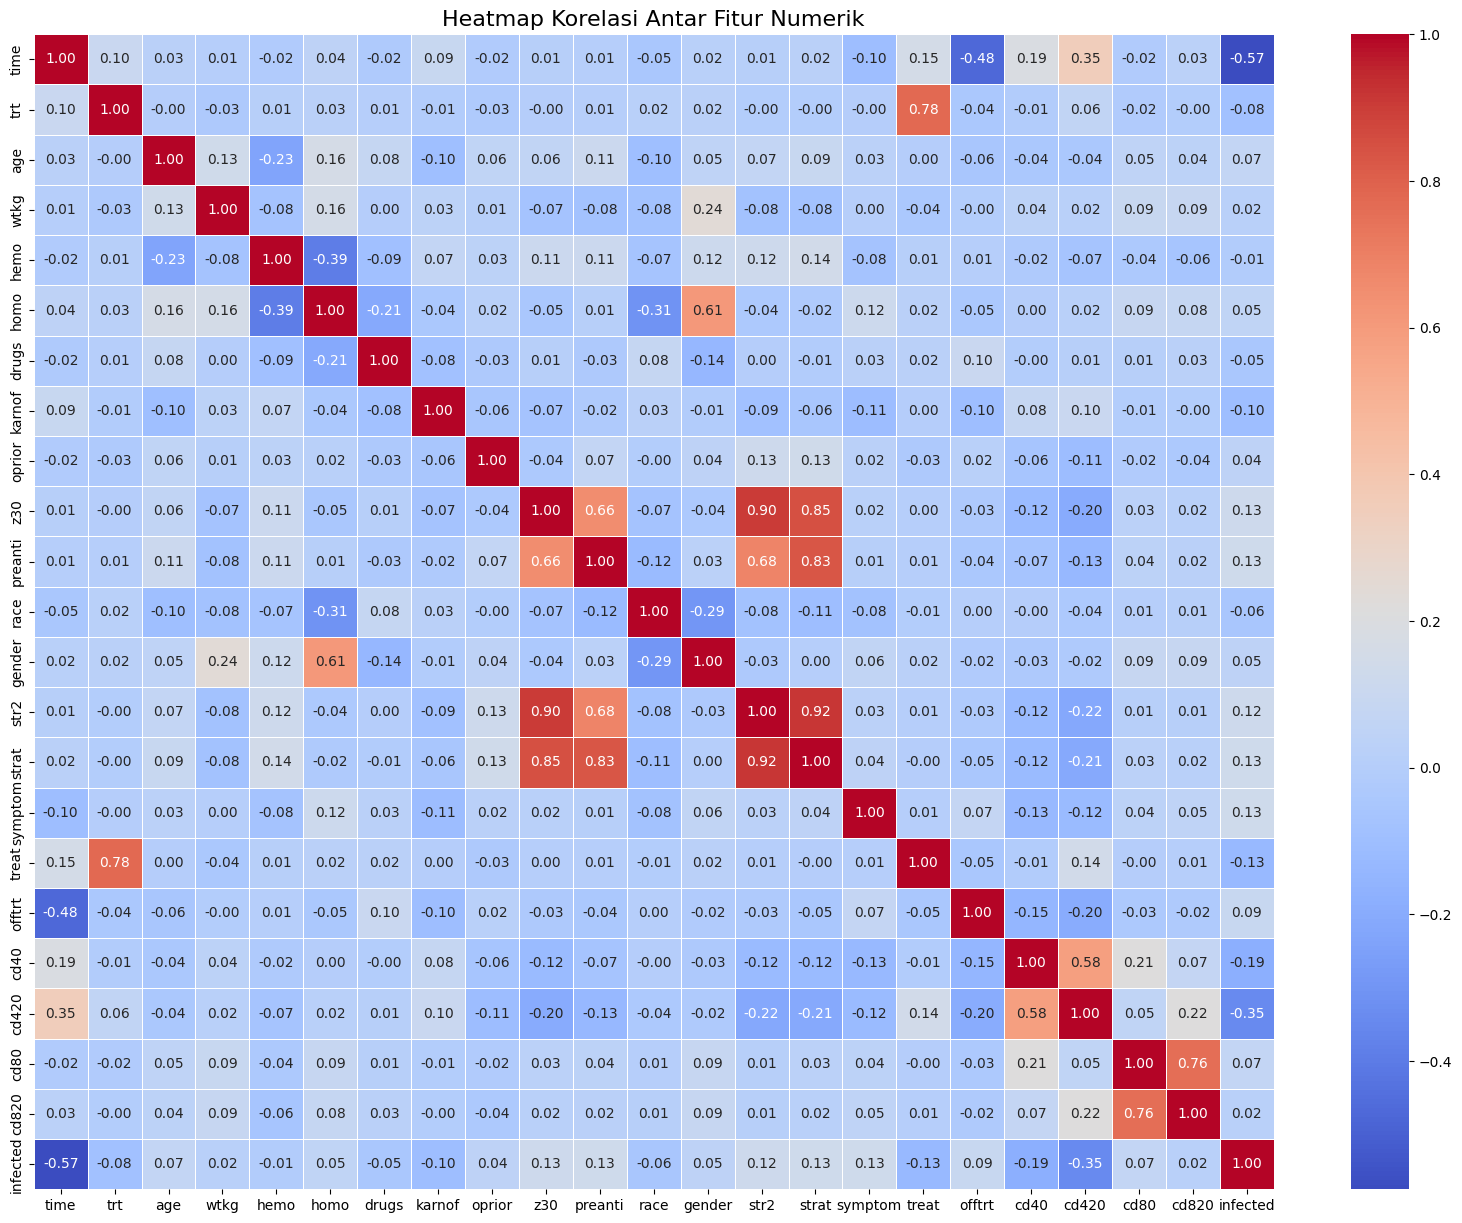

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)

plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=16)
plt.show()

**Korelasi Positif Terkuat (Merah Tua)**
1. str2 vs strat (Korelasi: 0.92), Korelasi ini sangat mendekati 1, yang berarti kedua fitur ini hampir identik. str2 (naive/experienced) dan strat (stratifikasi riwayat terapi) pada dasarnya adalah informasi yang redundan.
2. preanti vs strat (Korelasi: 0.85) & preanti vs str2 (Korelasi: 0.68), Jumlah hari terapi sebelumnya (preanti) sangat berhubungan dengan status "berpengalaman" (str2) dan stratifikasinya (strat).
3. cd80 vs cd820 (Korelasi: 0.76), Jumlah CD8 di awal studi sangat berkorelasi dengan jumlah CD8 di minggu ke-20. Ini menunjukkan konsistensi pengukuran pada pasien.
4. drugs vs gender (Korelasi: 0.61), Terdapat korelasi positif moderat antara riwayat penggunaan narkoba suntik dan gender. Mengingat gender=1 adalah laki-laki dan drugs=1 adalah ya, ini berarti dalam dataset ini, pasien laki-laki lebih cenderung memiliki riwayat penggunaan narkoba suntik.


**Korelasi Negatif Terkuat (Biru Tua)**
1. time vs offtrt (Korelasi: -0.78), Ini adalah korelasi negatif terkuat di heatmap. time adalah waktu bertahan hidup, dan offtrt=1 berarti pasien berhenti dari perawatan. Korelasi ini berarti pasien yang berhenti dari perawatan (offtrt=1) sangat erat hubungannya dengan waktu bertahan hidup yang lebih singkat (nilai time lebih rendah). Ini adalah temuan klinis yang sangat signifikan.
2. time vs infected (Korelasi: -0.57), Pasien yang terinfeksi AIDS (infected=1) memiliki hubungan kuat dengan waktu bertahan hidup yang lebih singkat (nilai time lebih rendah). Ini sesuai dengan ekspektasi.

### **Pengecekan Outlier**

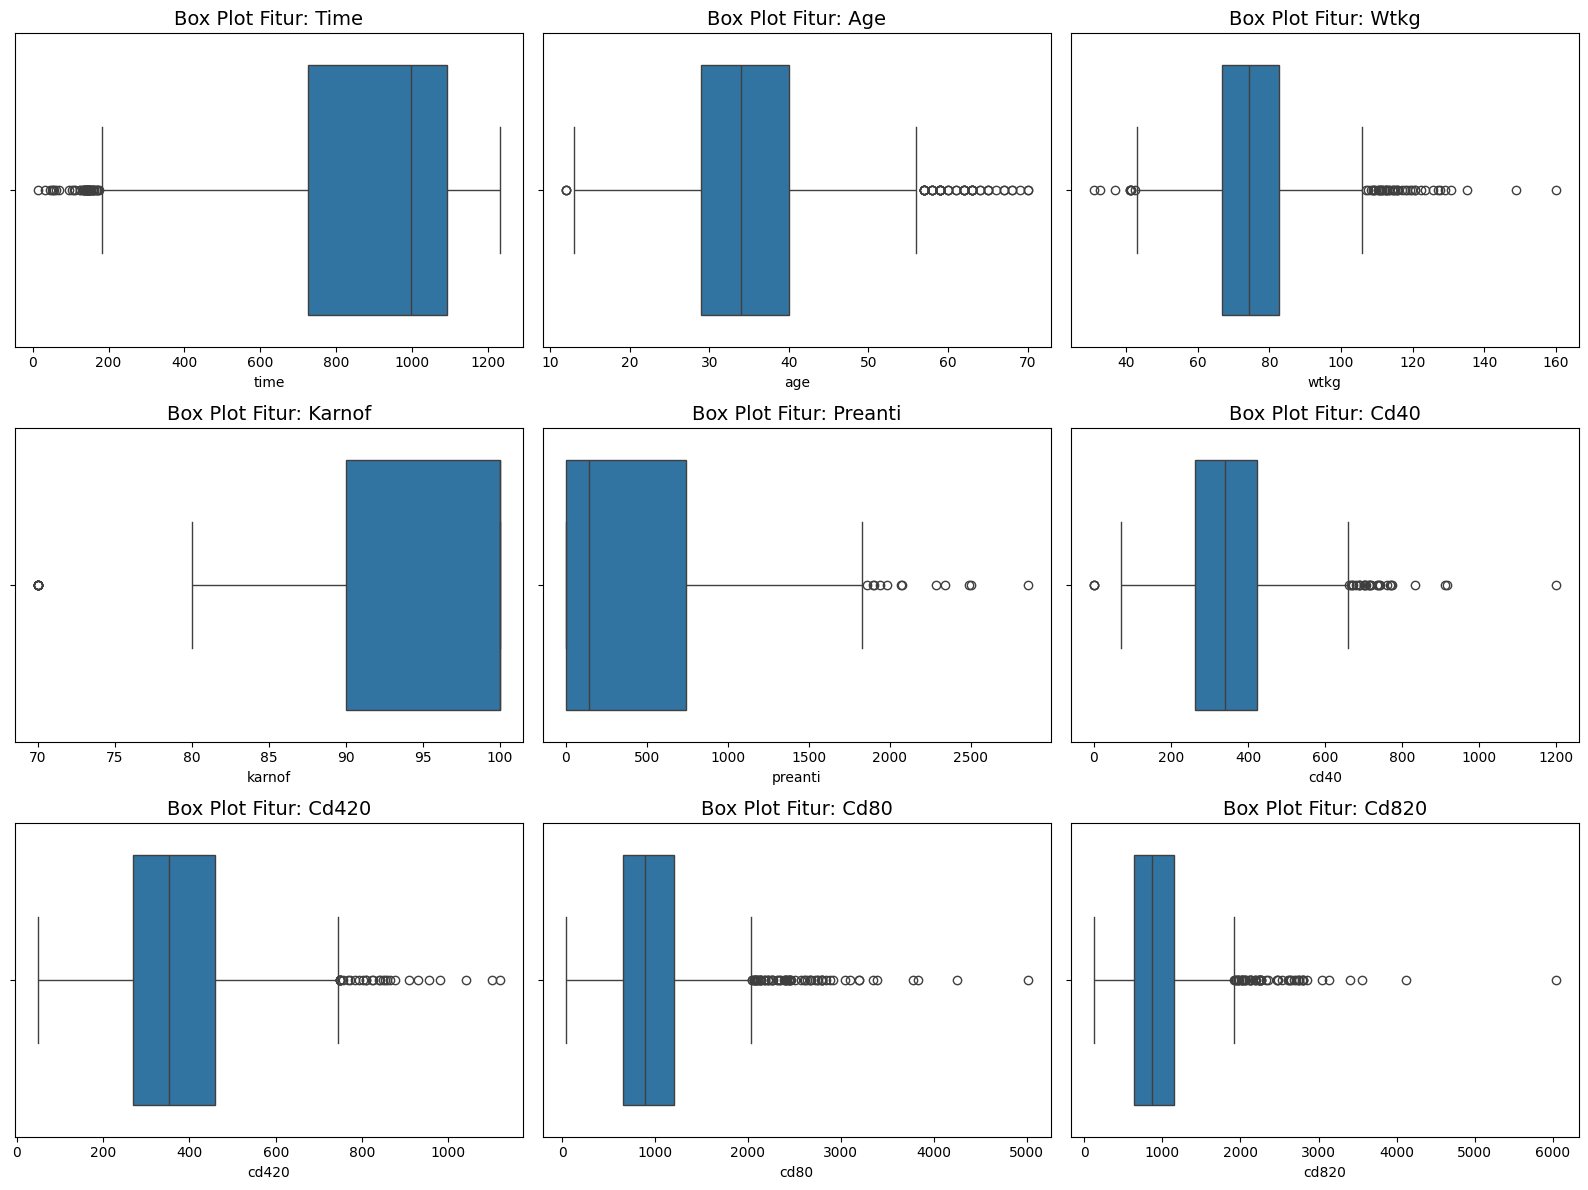

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x=df_mapped[col], ax=axes[i])
    axes[i].set_title(f'Box Plot Fitur: {col.capitalize()}', fontsize=14)

for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Analisis visual menunjukkan bahwa hampir semua fitur numerik memiliki outlier. Karakteristik outlier ini bervariasi: beberapa fitur memiliki outlier di nilai rendah (misalnya karnof), beberapa di nilai tinggi (misalnya semua fitur CD4/CD8 dan preanti), dan beberapa di kedua sisi (misalnya age dan wtkg). Ini mengindikasikan bahwa data tidak terdistribusi secara normal sempurna dan ada kasus-kasus ekstrem yang perlu diperhatikan.

- Time, Sebagian besar data berada di rentang waktu yang tinggi (sekitar 500-1100). Namun, ada beberapa titik outlier yang menunjukkan pasien dengan waktu bertahan hidup yang sangat singkat.
- Karnof (Skor Fungsional), Data sangat terkonsentrasi pada skor 90-100 (kondisi sangat baik). Titik-titik di skor 70 dianggap sebagai outlier, menandakan adanya sekelompok kecil pasien dengan kondisi fungsional yang jauh di bawah mayoritas.
- Preanti (Hari Terapi Sebelumnya): Sebagian besar pasien memiliki sedikit atau nol hari terapi sebelumnya (kotak/box sangat dekat dengan nol). Namun, ada banyak outlier di sisi kanan, yang merepresentasikan pasien dengan riwayat pengobatan yang sangat panjang.
- cd40, cd420, cd80, cd820 (Semua Fitur CD Count): Keempat fitur ini menunjukkan pola yang sama. "Badan" utama data terkonsentrasi di nilai yang lebih rendah, tetapi ada "ekor" panjang ke kanan dengan banyak outlier. Ini berarti ada sekelompok pasien dengan jumlah sel CD4 atau CD8 yang luar biasa tinggi dibandingkan dengan mayoritas populasi studi.
- Age (Usia), Sebaran usia cukup simetris dengan pusat di sekitar 35 tahun. Namun, ada outlier yang jelas di kedua ujung, yaitu pasien yang jauh lebih muda (di bawah 20) dan jauh lebih tua (di atas 60) dari kelompok utama.
- Wtkg (Berat Badan), Mirip dengan usia, distribusi berat badan cukup simetris. Namun, ada pasien dengan berat badan yang sangat rendah (< 50 kg) dan sangat tinggi (> 110 kg) yang dianggap sebagai outlier.

# **5. Data Preprocessing**

### **Pembagian Data**

In [24]:
# Memisah Fitur dan Target
X = df.drop('infected', axis=1)
y = df['infected']

# Memisah Train dan Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print Distribusi Data
print(f"Total Data        : {len(X)}")
print(f"Jumlah Data Train : {len(X_train)}")
print(f"Jumlah Data Test  : {len(X_test)}")

Total Data        : 2139
Jumlah Data Train : 1711
Jumlah Data Test  : 428


Distribusi data train dan test menunjukkan pembagian yang seimbang dari total 2139 sampel, dengan 1711 sampel (80%) dialokasikan untuk data train dan 428 sampel (20%) untuk data test, sesuai dengan parameter test_size=0.2. Penggunaan stratify=y memastikan distribusi kelas infected dipertahankan secara proporsional di kedua set, mendukung analisis yang konsisten dan representatif.

### **Menghapus Outlier**

In [25]:
# Menggabung fitur dan target pada data training
X_train['infected'] = y_train

# Looping untuk setiap fitur numerik
for col in numerical_features:
    # Hitung Q1, Q3, dan IQR
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter DataFrame, HANYA MEMPERTAHANKAN baris yang berada DI DALAM batas
    X_train_no_outliers = X_train[
        (X_train[col] >= lower_bound) &
        (X_train[col] <= upper_bound)
    ]

print(f"Sebelum Remove Outlier : \n{X_train.infected.value_counts()}")
print(f"\n\nSetelah Remove Outlier : \n{X_train_no_outliers.infected.value_counts()}")

# Memisah kembali fitur dan target
y_train = X_train_no_outliers['infected']
X_train = X_train_no_outliers.drop('infected', axis=1)

Sebelum Remove Outlier : 
infected
0    1294
1     417
Name: count, dtype: int64


Setelah Remove Outlier : 
infected
0    1254
1     401
Name: count, dtype: int64


terdapat perubahan yang tidak terlalu banyak dalam distribusi kelas infected (status infeksi AIDS: 0 = Tidak, 1 = Ya) sebelum dan setelah proses penghapusan outlier pada data training. Sebelum penghapusan outlier, dataset terdiri dari 1294 pasien dengan status infected = 0 dan 417 pasien dengan status infected = 1, menghasilkan total 1711 pasien. Setelah proses penghapusan outlier, jumlah pasien berkurang menjadi 1254 untuk infected = 0 dan 401 untuk infected = 1, dengan total 1655 pasien, yang menunjukkan pengurangan sebesar 56 pasien.

### **Oversampling**

In [ ]:
# Pembuatan Object SmoteNC
smote = SMOTENC(random_state=42, categorical_features=[1, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17])

# Oversampling
X_res, y_res = smote.fit_resample(X_train, y_train)

# Print Output
print(f"Sebelum SMOTENC :\n{y_train.value_counts()}")
print(f"\nSetelah SMOTENC :\n{y_res.value_counts()}")

Sebelum SMOTENC :
infected
0    1254
1     401
Name: count, dtype: int64

Setelah SMOTENC :
infected
0    1254
1    1254
Name: count, dtype: int64


Distribusi kelas target infected sebelum oversampling dengan SMOTENC menunjukkan ketidakseimbangan, dengan 1254 sampel untuk kelas mayoritas (0 - tidak terinfeksi) dan hanya 401 sampel untuk kelas minoritas (1 - terinfeksi). Setelah proses oversampling menggunakan SMOTENC, distribusi menjadi seimbang, dengan masing-masing kelas memiliki 1254 sampel, yang dicapai melalui sintesis data tambahan untuk kelas minoritas. Pendekatan ini penting untuk mengurangi bias dalam model machine learning, memungkinkan pelatihan yang lebih adil terhadap pola kedua kelas, dan berpotensi meningkatkan kemampuan model dalam memprediksi kasus infeksi yang sebenarnya.

### **Normalisasi Data Dengan Min Max Scaler**

In [27]:
# Pembuatan Object StandardScaler
scaler = MinMaxScaler()

print("Sebelum Min Max Scaler")
display(X_res[numerical_features].describe())

# Scaling
X_res[numerical_features] = scaler.fit_transform(X_res[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("\n\nSetelah Min Max Scaler")
display(X_res[numerical_features].describe())

Sebelum Min Max Scaler


,time,age,wtkg,karnof,preanti,cd40,cd420,cd80,cd820
count,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000
mean,777.125997,35.476475,75.098171,94.925439,401.571770,336.665869,341.094896,952.887560,878.861643
std,309.252137,8.550085,12.543353,5.763905,477.219348,113.178356,139.325298,399.977898,340.862321
min,14.000000,12.000000,41.000000,70.000000,0.000000,0.000000,49.000000,40.000000,131.000000
25%,504.750000,29.000000,67.189635,90.000000,0.000000,251.000000,240.000000,655.000000,622.000000
50%,858.500000,34.000000,74.390400,98.000000,197.500000,324.000000,321.000000,894.000000,828.000000
75%,1053.250000,40.000000,81.648000,100.000000,784.250000,409.250000,426.000000,1178.250000,1099.250000
max,1231.000000,70.000000,159.939360,100.000000,2851.000000,918.000000,1119.000000,3389.000000,1905.000000




Setelah Min Max Scaler


,time,age,wtkg,karnof,preanti,cd40,cd420,cd80,cd820
count,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000
mean,0.627055,0.404767,0.286685,0.830848,0.140853,0.366738,0.272986,0.272585,0.421568
std,0.254110,0.147415,0.105460,0.192130,0.167387,0.123288,0.130211,0.119432,0.192143
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.403246,0.293103,0.220193,0.666667,0.000000,0.273420,0.178505,0.183637,0.276776
50%,0.693919,0.379310,0.280735,0.933333,0.069274,0.352941,0.254206,0.255001,0.392897
75%,0.853944,0.482759,0.341754,1.000000,0.275079,0.445806,0.352336,0.339878,0.545800
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Berdasarkan tabel statistik deskriptif yang disajikan, terlihat jelas dampak penerapan Min-Max Scaler pada fitur-fitur numerik seperti time, age, wtkg, karnof, preanti, cd40, cd420, cd80, dan cd820.

1. Sebelum Scaling:
Fitur-fitur ini menunjukkan rentang nilai yang bervariasi secara signifikan. Sebagai contoh:

  - time memiliki rentang dari 14.00 hingga 1231.00, dengan mean 777.125997 dan std 309.252137.
  - age berkisar dari 12.00 hingga 70.00, dengan mean 35.476475.
  - cd80 memiliki min 399.00 dan max 1905.00. Rentang nilai yang besar dan mean
  - standar deviasi yang bervariasi ini mencerminkan skala asli dari setiap fitur.


2. Setelah Min-Max Scaler Diterapkan:
Semua fitur telah berhasil diskalakan ke rentang [0, 1]. Hal ini terlihat dari:

  - Nilai min untuk semua fitur menjadi 0.000000.
  - Nilai max untuk semua fitur menjadi 1.000000.
  - mean dan std dari fitur-fitur tersebut sekarang berada dalam skala yang jauh lebih kecil dan konsisten (misalnya, mean untuk time menjadi 0.627055 dan std 0.254110).

### **Export Data**

In [28]:
# Menggabung jadi 1 dataset
X_res['infected'] = y_res
X_test['infected'] = y_test

# Export Dataset
X_res.to_csv(f"{PROJECT_PATH}/train.csv", index=False)
X_test.to_csv(f"{PROJECT_PATH}/test.csv", index=False)